In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [69]:
V0, v0 = 1, 0
V = [V0]
v = [v0]

lambda_ = 10#100**(1)
cnt = 0
k_max = int(10*(lambda_-1)+5)
print('k_max   :', k_max)
for k in range(1, k_max):
#     print(k)
    V_k = (lambda_-1)/(lambda_+1) * V[k-1] - (2)/(lambda_+1) * v[k-1]
    v_k = (2*lambda_)/(lambda_+1) * V[k-1] + (lambda_-1)/(lambda_+1) * v[k-1]
    V.append(V_k)
    v.append(v_k)
    cond1 = 0# V_k < v_k and v_k <= 0  # both move backwards, big block moves faster
    cond2 = 0#V_k < 0 and -V_k > v_k > 0  # big block moves backwards, small block will be reflected one more time
#     print('k =', k)
    if cond2:
        cnt = 2*k
        print('[break] Cond2 satisfied')
        break
    elif cond1:
        cnt = 2*k-1
        print('[break] Cond1 satisfied')
        break
print('k       :', k)
print('# clicks:', cnt)

k_max   : 95
k       : 94
# clicks: 0


In [70]:
print('k  \t V     v')
print('-'*20)
for k, (Vk, vk) in enumerate(zip(V, v)):
    if (k<3 or k> len(V)-5):
        print('{}  \t{:.2f}  {:.2f}'.format(k, Vk, vk))
    elif k == 3:
        print('  \t...    ...')

k  	 V     v
--------------------
0  	1.00  0.00
1  	0.82  1.82
2  	0.34  2.98
  	...    ...
91  	0.69  -2.28
92  	0.98  -0.61
93  	0.91  1.29
94  	0.51  2.71


In [31]:
x = [k for k in range(len(V))]
zero = [0 for _ in range(len(V))]

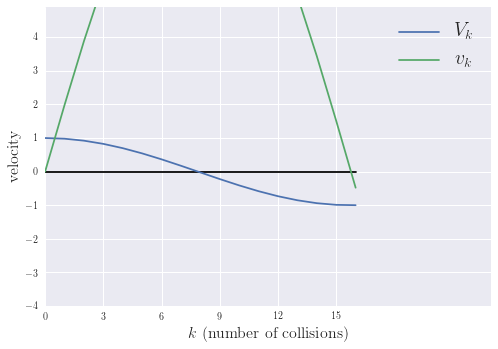

In [32]:
plt.plot(x, zero, 'k-')
plt.plot(x, V, '-', label=r'$V_k$')
plt.plot(x, v, '-', label=r'$v_k$')
plt.xlabel(r'$k$ (number of collisions)', fontsize=16)
plt.ylabel('velocity', fontsize=16)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.axis([0, 23, -4, 4.9])
plt.legend(fontsize=20);

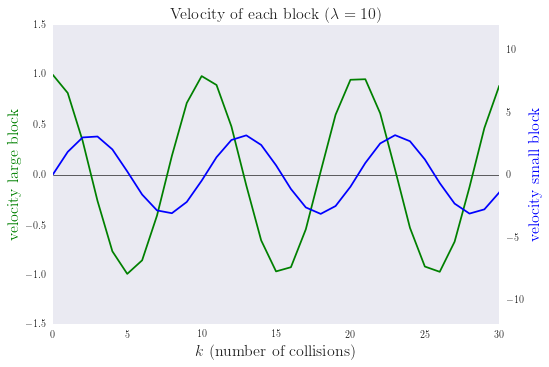

In [73]:
x = np.arange(0, len(V), 1)
zero = [0 for _ in range(len(V))]
fig, ax1 = plt.subplots()
ax1.plot(x, zero, 'k-', linewidth=0.6)
# ax1.text(0.35, 0.5, 'Close Me!', dict(size=30))
ax1.set_title('Velocity of each block ($\lambda={}$)'.format(lambda_), fontsize=16)

colorV = 'g'
colorv = 'b'

ax2 = ax1.twinx()
ax1.plot(x, V, '-', color=colorV)
ax2.plot(x, v, '-', color=colorv)

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')
ax1.grid(False)
ax2.grid(False)

ax1.set_xlabel(r'$k$ (number of collisions)', fontsize=16)
ax1.set_ylabel('velocity large block', fontsize=16, color=colorV)
ax2.set_ylabel('velocity small block', fontsize=16, color=colorv);
# plt.xticks(np.arange(min(x), max(x)+1, 3))
# plt.axis([0, 23, -4, 4.9])
# ax1.legend(fontsize=20)
Vmax = 1.5
vmax = 12
xmax = 30#max(x)+1
ax1.set_xlim(0, xmax)
ax1.set_ylim(-Vmax, Vmax)
ax2.set_ylim(-vmax, vmax);